# 1.request 모듈:<br>HTTP프로토콜 쓸수있게함.
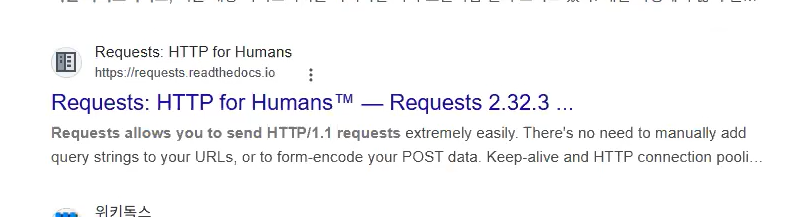 
#### 바로가기있어염
[requests](https://requests.readthedocs.io/en/latest/user/quickstart/)
- 설치: 새로운 cmd에서
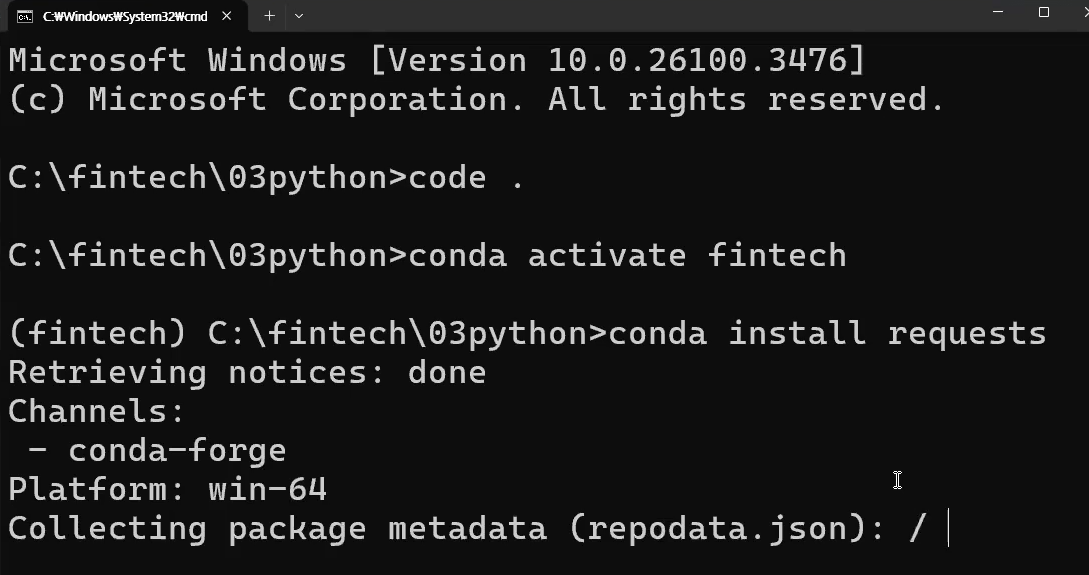
설치 후 확인은 conda list에서
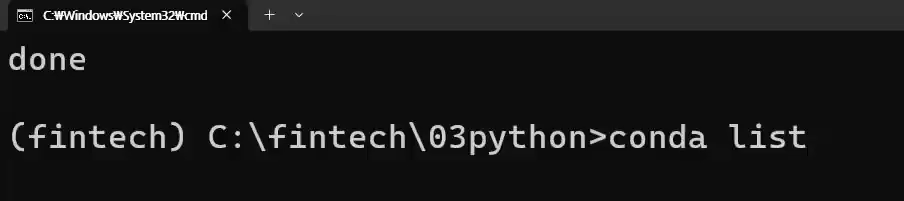
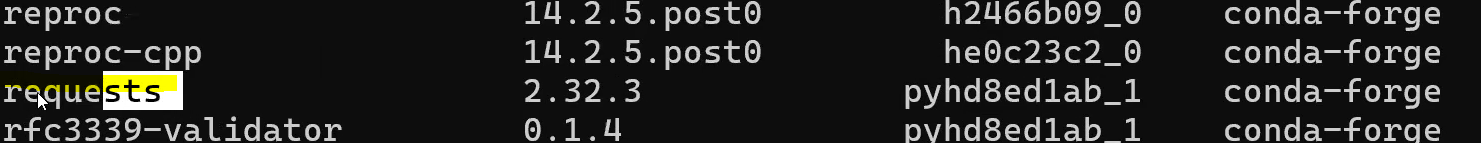

In [1]:
import requests

In [2]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.get('https://httpbin.org/get', params=payload)
r.text          #이부분 url 네이버개발센터꺼 들어갈자리.

#### 위 두 셀은 리퀘스트 퀵스타츠에서 가져온 코드들.

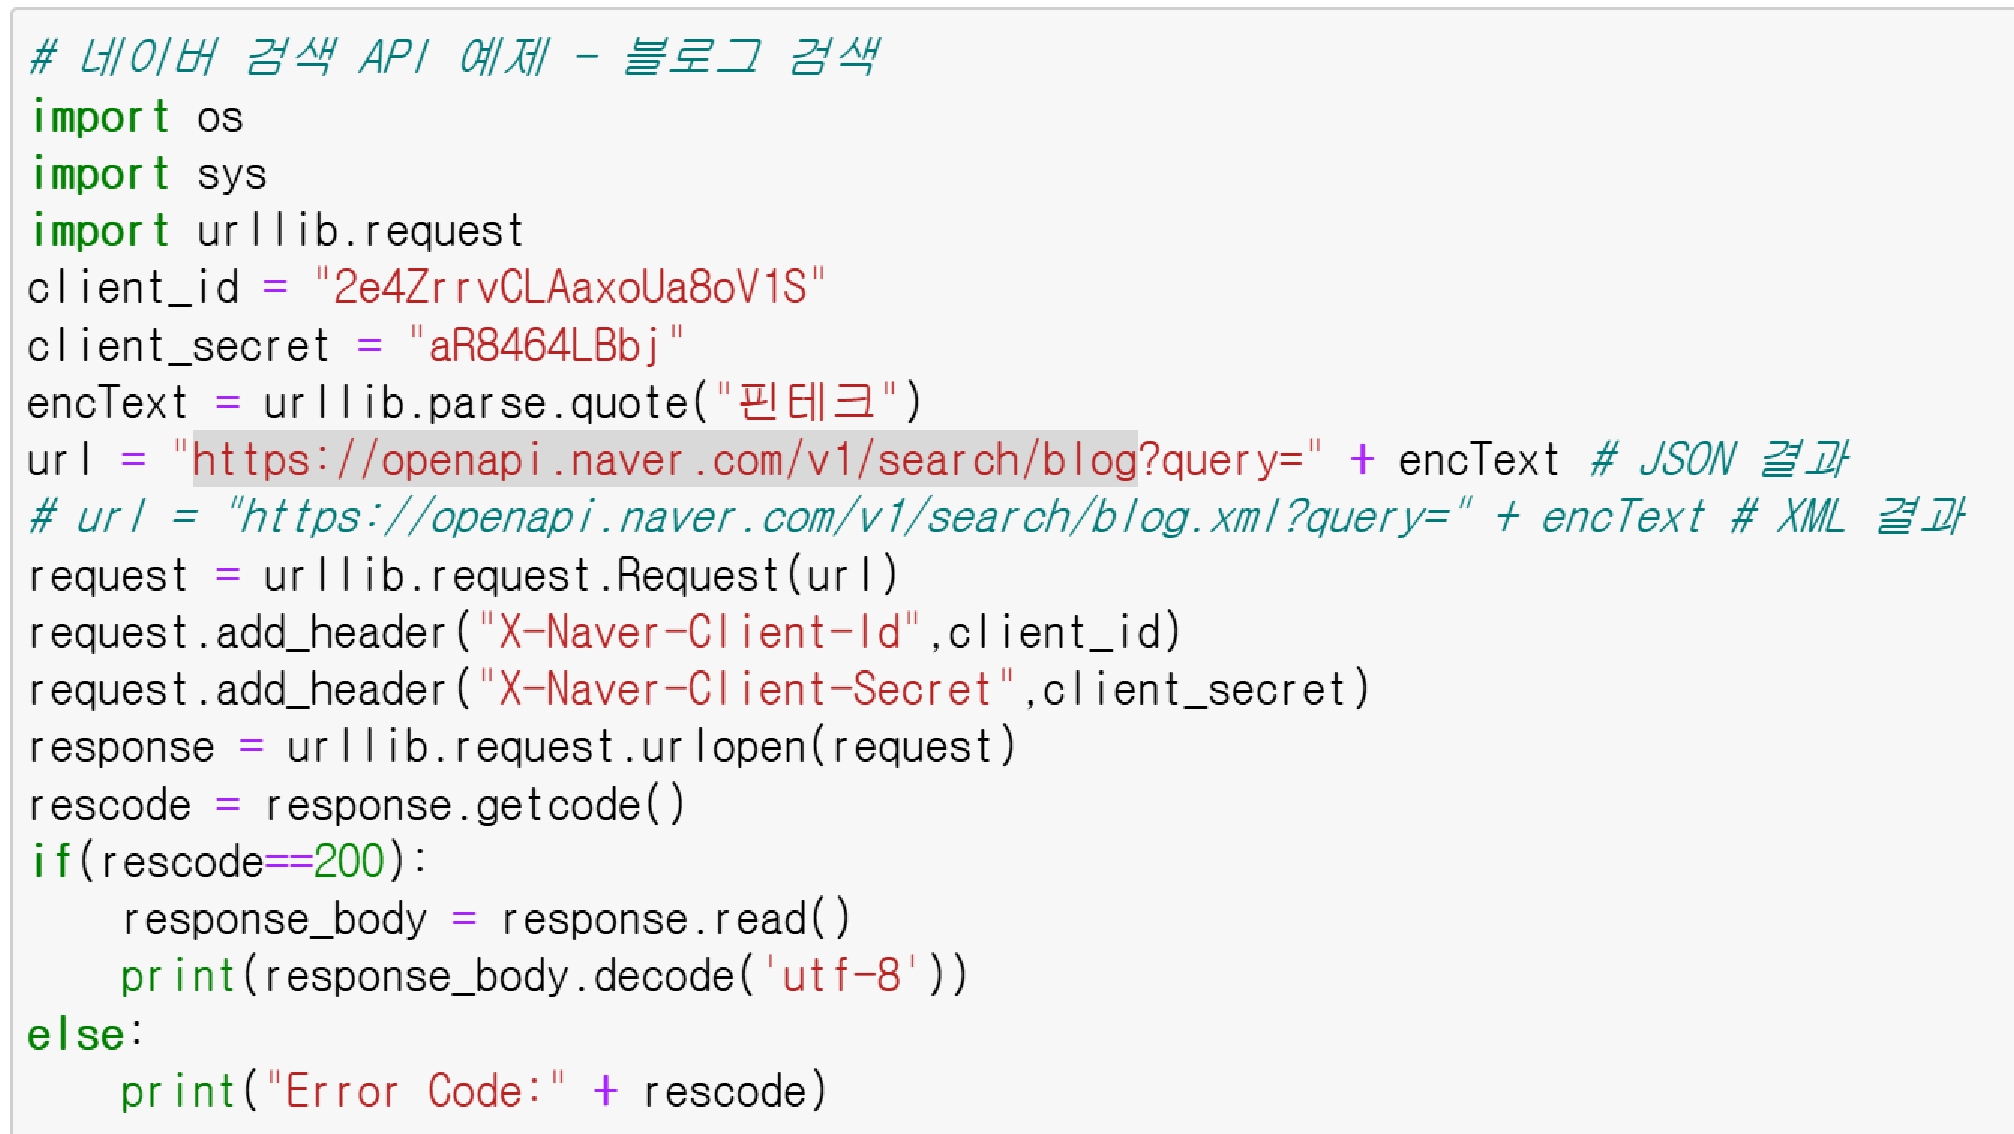

In [4]:
url="https://openapi.naver.com/v1/search/blog"

In [2]:
payload = {'query': '핀테크', 'display': '1', 'start':1, 'sort':'sim'}
r = requests.get(url, params=payload)
r.text 

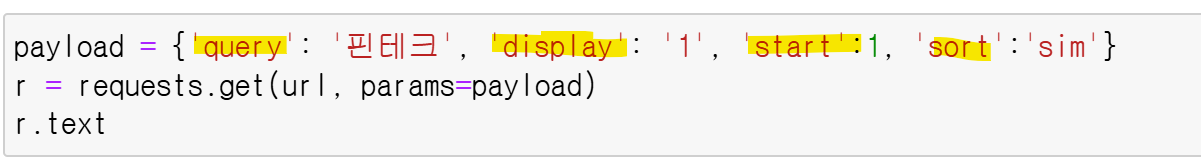
순서는 아래 순서와 같은것. 
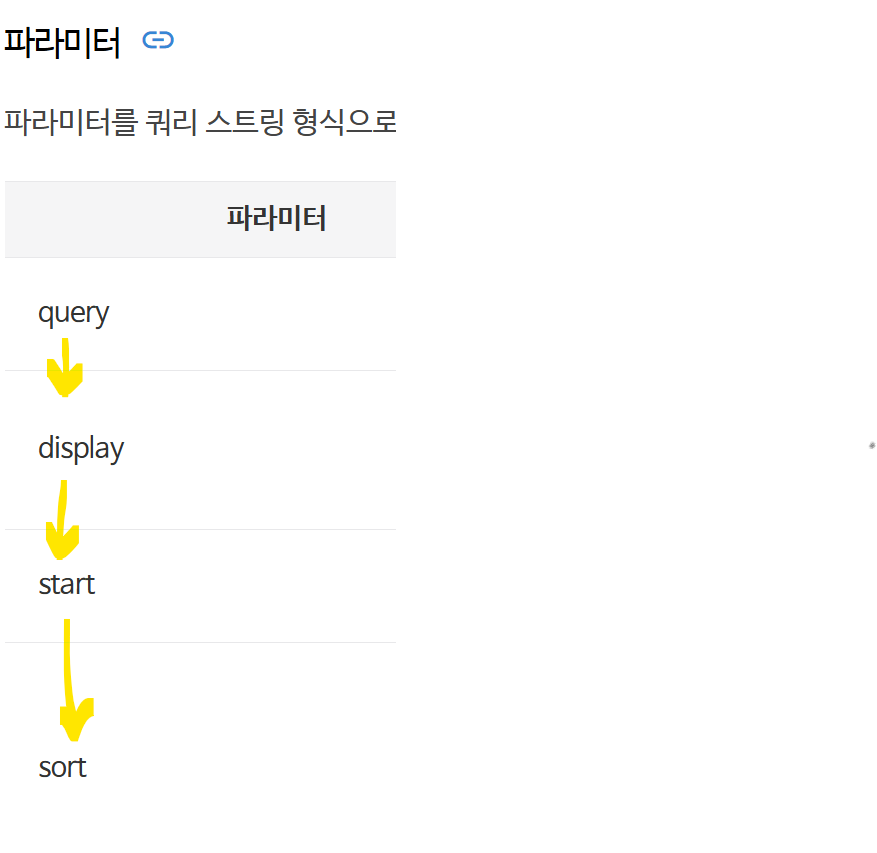
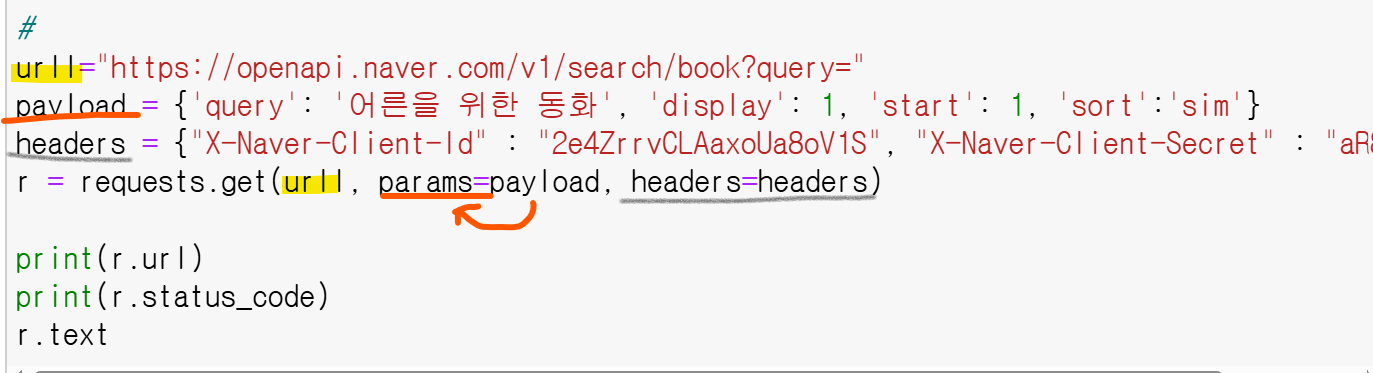

In [5]:
payload = {'query': '핀테크', 'display': '1', 'start':1, 'sort':'sim'}
r = requests.get(url, params=payload)
r.text 

'{"errorMessage":"Not Exist Client ID : Authentication failed. (인증에 실패했습니다.)","errorCode":"024"}'

In [7]:
# 체크
payload

{'query': '핀테크', 'display': '1', 'start': 1, 'sort': 'sim'}

실행해보면 아이디 비번 안들어갔다고 나옴
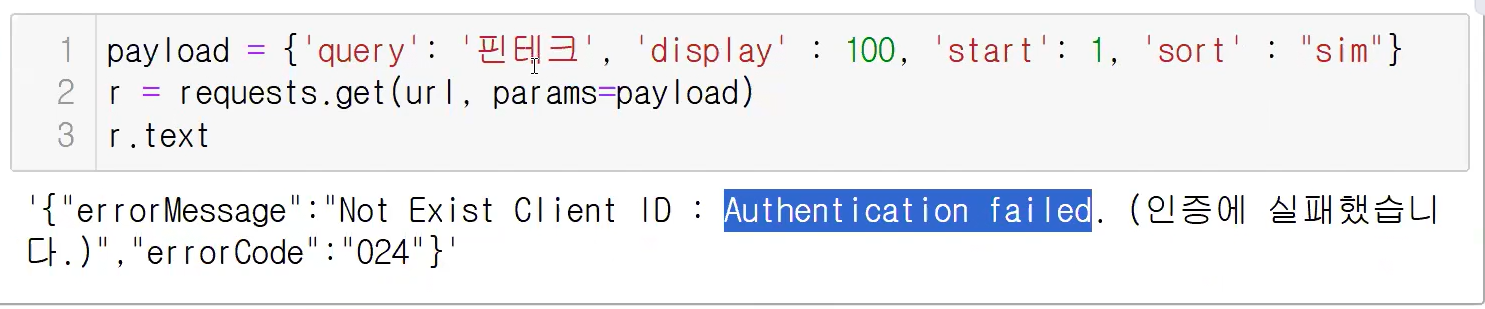
헤더에 넣으면 된다.
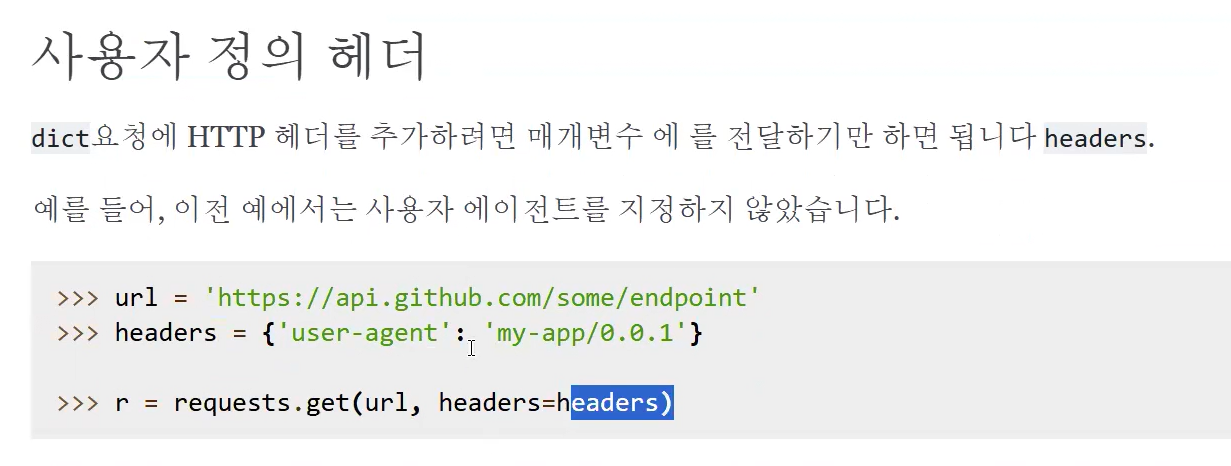
이런 형태로 넣어달라 했으니 지켜야함.

In [11]:
#  아이디 비번 넣기 - 네이버 어플리케이션정보
payload = {'query': '핀테크', 'display': '1', 'start':1, 'sort':'sim'}

#여기다 넣어줄건데 키벨 형식 주의
headers = {client_id : "2e4ZrrvCLAaxoUa8oV1S", client_secret : "aR8464LBbj"}
# headers 찍어보니나오고 

# r = requests.get(url, params=payload)
# r.text 

NameError: name 'client_id' is not defined

 바꿔야할 값이 아직 있음. 아래에서 가져와야함.
 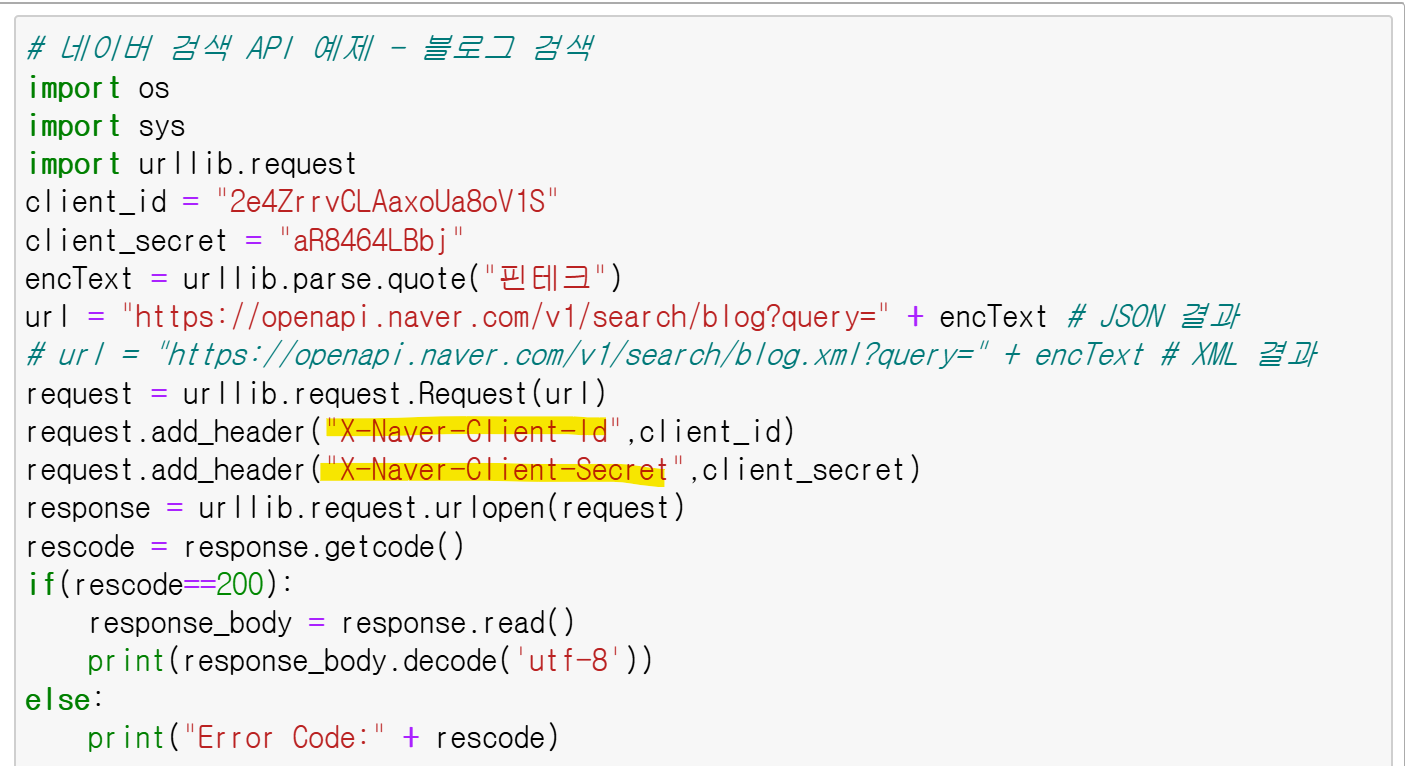
이 코드와 아래 코드를 비교해보면 인코딩, 디코딩 과정이 짧음.

In [12]:
#  아이디 비번 넣기
payload = {'query': '핀테크', 'display': '1', 'start':1, 'sort':'sim'}
headers = {"X-Naver-Client-Id" : "2e4ZrrvCLAaxoUa8oV1S", "X-Naver-Client-Secret" : "aR8464LBbj"}
               #리퀘스트 퀵스타트 그대로. 
r = requests.get(url, params=payload, headers=headers)
r.text 

'{\n\t"lastBuildDate":"Wed, 09 Apr 2025 16:30:12 +0900",\n\t"total":457641,\n\t"start":1,\n\t"display":1,\n\t"items":[\n\t\t{\n\t\t\t"title":"<b>핀테크<\\/b> 기업 소개합니다",\n\t\t\t"link":"https:\\/\\/blog.naver.com\\/fdgbrhyjg_1\\/223824689173",\n\t\t\t"description":"&quot;<b>핀테크<\\/b> 혁명이 불러온 따뜻한 변화  — 당신의 금융, 한 걸음 더 가까이 혹시 이런 고민 가져본 적... 2025년의 금융 세계, 특히 <b>핀테크<\\/b> 기업의 발돋움이 우리의 일상적인 재정 생활을 놀랍도록 편리하게... ",\n\t\t\t"bloggername":"✅ 자동차 공식 인증 Blog",\n\t\t\t"bloggerlink":"blog.naver.com\\/fdgbrhyjg_1",\n\t\t\t"postdate":"20250408"\n\t\t}\n\t]\n}'

In [13]:
# Json 불러오지 않고 바로 변환 하기 - 리퀘스트만의 효율
payload = {'query': '핀테크', 'display': '1', 'start':1, 'sort':'sim'}
headers = {"X-Naver-Client-Id" : "2e4ZrrvCLAaxoUa8oV1S", "X-Naver-Client-Secret" : "aR8464LBbj"}
r = requests.get(url, params=payload, headers=headers)
data=r.json() #여기가 바뀜
data

{'lastBuildDate': 'Wed, 09 Apr 2025 16:32:55 +0900',
 'total': 457627,
 'start': 1,
 'display': 1,
 'items': [{'title': '<b>핀테크</b> 기업 소개합니다',
   'link': 'https://blog.naver.com/fdgbrhyjg_1/223824689173',
   'description': '&quot;<b>핀테크</b> 혁명이 불러온 따뜻한 변화  — 당신의 금융, 한 걸음 더 가까이 혹시 이런 고민 가져본 적... 2025년의 금융 세계, 특히 <b>핀테크</b> 기업의 발돋움이 우리의 일상적인 재정 생활을 놀랍도록 편리하게... ',
   'bloggername': '✅ 자동차 공식 인증 Blog',
   'bloggerlink': 'blog.naver.com/fdgbrhyjg_1',
   'postdate': '20250408'}]}

위 내용 결과
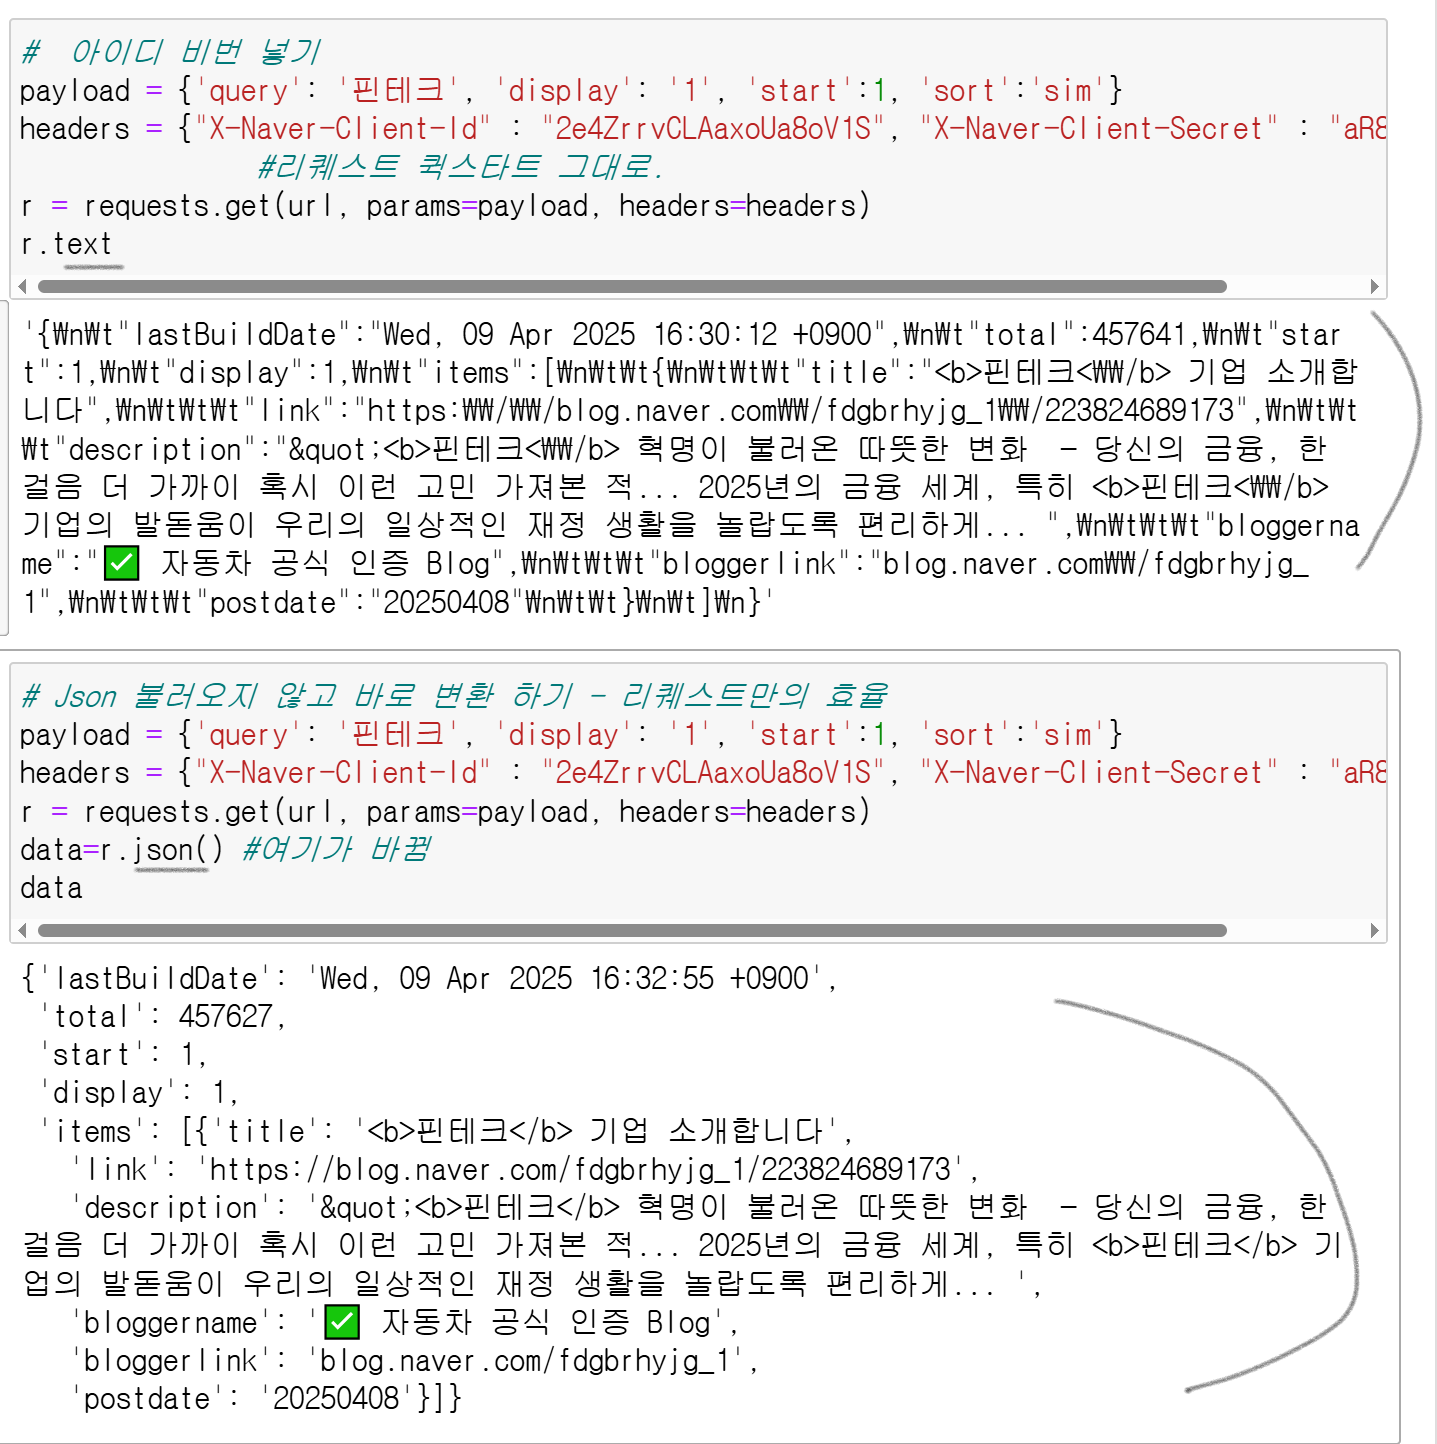

#### 추가적으로 url 이상없는지 확인하는 기능. 응답코드도 같이 찍어보기.
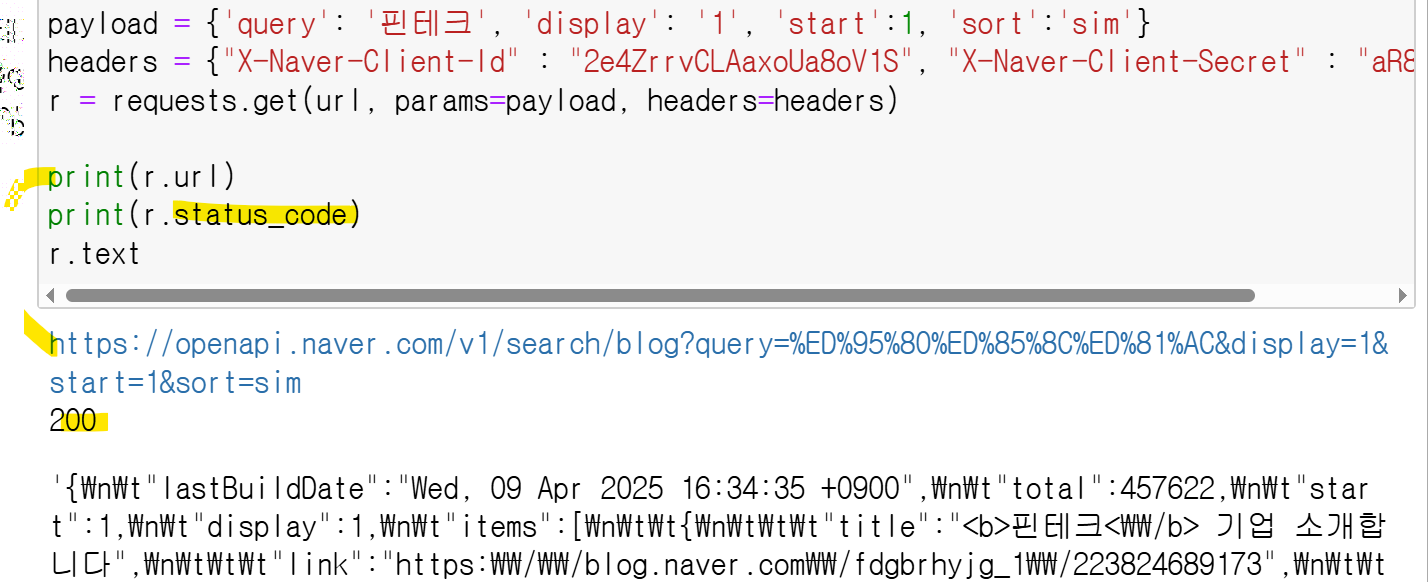

In [14]:
#  
payload = {'query': '핀테크', 'display': '1', 'start':1, 'sort':'sim'}
headers = {"X-Naver-Client-Id" : "2e4ZrrvCLAaxoUa8oV1S", "X-Naver-Client-Secret" : "aR8464LBbj"}
r = requests.get(url, params=payload, headers=headers)

print(r.url)
print(r.status_code)
r.text 

https://openapi.naver.com/v1/search/blog?query=%ED%95%80%ED%85%8C%ED%81%AC&display=1&start=1&sort=sim
200


'{\n\t"lastBuildDate":"Wed, 09 Apr 2025 16:34:35 +0900",\n\t"total":457622,\n\t"start":1,\n\t"display":1,\n\t"items":[\n\t\t{\n\t\t\t"title":"<b>핀테크<\\/b> 기업 소개합니다",\n\t\t\t"link":"https:\\/\\/blog.naver.com\\/fdgbrhyjg_1\\/223824689173",\n\t\t\t"description":"&quot;<b>핀테크<\\/b> 혁명이 불러온 따뜻한 변화  — 당신의 금융, 한 걸음 더 가까이 혹시 이런 고민 가져본 적... 2025년의 금융 세계, 특히 <b>핀테크<\\/b> 기업의 발돋움이 우리의 일상적인 재정 생활을 놀랍도록 편리하게... ",\n\t\t\t"bloggername":"✅ 자동차 공식 인증 Blog",\n\t\t\t"bloggerlink":"blog.naver.com\\/fdgbrhyjg_1",\n\t\t\t"postdate":"20250408"\n\t\t}\n\t]\n}'

### 네이버검색 API를 이용해서 **책**을 검색하고 결과를 DF로 만드세요.
- 검색어는 input()에 입력받은 값을 이용하기.

In [ ]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
client_id = "YOUR_CLIENT_ID"
client_secret = "YOUR_CLIENT_SECRET"
encText = urllib.parse.quote("검색할 단어")
url = "https://openapi.naver.com/v1/search/book?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

In [15]:
#  
urll="https://openapi.naver.com/v1/search/book?query="
payload = {'query': '어른을 위한 동화', 'display': 1, 'start': 1, 'sort':'sim'}
headers = {"X-Naver-Client-Id" : "2e4ZrrvCLAaxoUa8oV1S", "X-Naver-Client-Secret" : "aR8464LBbj"}
r = requests.get(urll, params=payload, headers=headers)

print(r.url)
print(r.status_code)
r.text 

https://openapi.naver.com/v1/search/book?query=&query=%EC%96%B4%EB%A5%B8%EC%9D%84+%EC%9C%84%ED%95%9C+%EB%8F%99%ED%99%94&display=1&start=1&sort=sim
200


'{\n\t"lastBuildDate":"Wed, 09 Apr 2025 16:43:01 +0900",\n\t"total":0,\n\t"start":1,\n\t"display":0,\n\t"items":[\n\t]\n}'

In [1]:
#쌤풀'
import requests
import pandas as pd

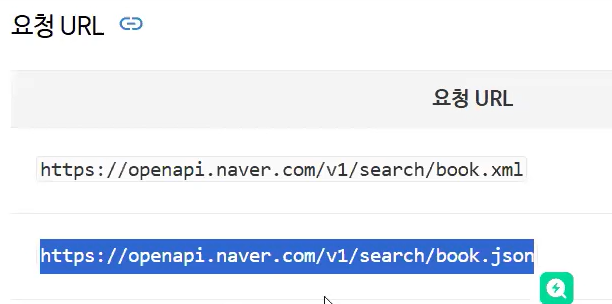
기본값이 몇개인지도 설명 참고할 것.

In [ ]:
#쌤풀'' ) 개발자사이트, 퀵스타트에서 
keyword=input("키워드 입력칸")
payload= dict(query=keyword, display=10, start=1, sort="sim")
url= "https://openapi.naver.com/v1/search/book.json"

In [ ]:
#쌤풀''' ) 개발자사이트, 퀵스타트에서 
keyword=input("키워드 입력칸")
payload= dict(query=keyword, display=10, start=1, sort="sim")
url= "https://openapi.naver.com/v1/search/book.json"

headers= {"X-Naver-Client-Id" : c_id, "X-Naver-Client-Secret" : c_secrete}

In [ ]:
#쌤풀'''' ) 개발자사이트, 퀵스타트에서 
keyword=input("키워드 입력칸")
payload= dict(query=keyword, display=10, start=1, sort="sim")
url= "https://openapi.naver.com/v1/search/book.json"

c_id="2e4ZrrvCLAaxoUa8oV1S"
c_secrete="aR8464LBbj"
headers= {"X-Naver-Client-Id" : c_id, "X-Naver-Client-Secret" : c_secrete}

In [2]:
#쌤풀'''''
keyword=input("키워드 입력칸")
url= "https://openapi.naver.com/v1/search/book.json"
c_id="2e4ZrrvCLAaxoUa8oV1S"
c_secrete="aR8464LBbj"

headers= {"X-Naver-Client-Id" : c_id, "X-Naver-Client-Secret" : c_secrete}
payload= dict(query=keyword, display=10, start=1, sort="sim")

# 자이제 url받을 자리
r = requests.get(url, params=payload, headers=headers)
print(r.url)
print(r.status_code)
data = r.json()
data

키워드 입력칸파이썬
https://openapi.naver.com/v1/search/book.json?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&display=10&start=1&sort=sim
200


{'lastBuildDate': 'Wed, 09 Apr 2025 16:54:27 +0900',
 'total': 1113,
 'start': 1,
 'display': 10,
 'items': [{'title': '혼자 만들면서 공부하는 파이썬 (37개 라이브러리와 API로 보고서, 차트, 게임, 맵, AI 챗봇 만들기|저자 직강 유튜브 강의, 오픈 채팅 제공)',
   'link': 'https://search.shopping.naver.com/book/catalog/52859338841',
   'image': 'https://shopping-phinf.pstatic.net/main_5285933/52859338841.20250209071357.jpg',
   'author': '문현일',
   'discount': '23400',
   'publisher': '한빛미디어',
   'pubdate': '20250214',
   'isbn': '9791169213271',
   'description': '“파이썬을 배워서 어디에 활용할 수 있을지 궁금했나요?”\n나의 신용카드 내역 분석, 우리 아파트 실거래가 시각화해보기, 맛집 지도 웹 앱 만들기 등 \n생활 속  15가지 파이썬 프로젝트를 직접 완성해 보며 재미있게 실전 경험 쌓기!\n\nQR 코드, 이미지 콜라주 등 일상과 가까운 생활형 프로젝트부터 부동산, 경제지표, 시가총액 같은 실용적인 데이터를 다루는 프로젝트, LLM, 멀티모달 AI와 TTS 등 최신 기술까지! 폭넓은 주제를 통해 흥미롭게 따라 해 보세요.\n\n●\t 주식 & 경제 데이터 분석 - 시가총액, 기준금리, 주요 경제지표 데이터 분석 및 시각화하기\n●\t 부동산 실거래가 분석 - 지역별 단위면적당 아파트 매매 실거래가 평균 지도로 만들기\n●\t 멀티모달 AI & 챗봇 개발 - 생성형 AI와 챗봇을 활용한 실시간 영자 신문 스크레이핑\n●\t 웹 자동화 & 크롤링 - 연관 키워드 분석을 통한 연령별, 성별 쇼핑 트렌드 분석\n●\

뽑아낸 데이터 데이터프레임에 정리하기.

In [ ]:
data # 이안에 필요한 데이터있는위치 포매터로 찾기.

In [7]:
#쌤풀''''''
result={}
for item in data['items']:
    for key, value in item.items():
        result.setdefault(key,[]).append(value)
df=pd.DataFrame(result)

In [8]:
df

,title,link,image,author,discount,publisher,pubdate,isbn,description
0,"혼자 만들면서 공부하는 파이썬 (37개 라이브러리와 API로 보고서, 차트, 게임,...",https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_528593...,문현일,23400,한빛미디어,20250214,9791169213271,“파이썬을 배워서 어디에 활용할 수 있을지 궁금했나요?”\n나의 신용카드 내역 분석...
1,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_325076...,윤인성,19800,한빛미디어,20220601,9791162245651,혼자 해도 충분하다! 1:1 과외하듯 배우는 파이썬 프로그래밍 자습서\n\n『혼자 ...
2,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_403540...,박응용,19800,이지스퍼블리싱,20230615,9791163034735,프로그래밍 분야 8년 연속 베스트셀러!\n《Do it! 점프 투 파이썬》 전면 개정...
3,밑바닥부터 시작하는 딥러닝 1(리마스터판) (파이썬으로 익히는 딥러닝 이론과 구현),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_526155...,사이토 고키,23400,한빛미디어,20250124,9791169213387,딥러닝 분야 부동의 베스트셀러!\n머리로 이해하고 손으로 익히는 가장 쉬운 딥러닝 ...
4,파이썬,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324609...,홍의경,29440,생능출판,20220309,9788970506784,코딩 실력을 키우는 지름길은 실습이다.\n\n2008년 즈음에 검인정 중학교 교과서...
5,CODING BASICS PYTHON (파이썬),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324409...,김상민^장성식^김일태,18000,렉스미디어닷넷,20220210,9788959604210,파이썬으로 다지는 프로그래밍의 기초\n\nㆍ 다양한 예제를 활용하여 초보자도 쉽게 ...
6,파이썬 (제2판),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324362...,염기원^오지영,16200,북두,20220120,9791166750991,책의 전반부는 비전공자의 입장에서 비전공자를 위한 파이썬 프로그래밍의 기초적인 내용...
7,파이썬,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324891...,천인국,10800,인피니티북스,20170830,9791185578330,컴퓨팅 사고(Computational Thinking)는 자넷 윙 교수가 2006년...
8,파이썬 (비전공자를위한 파이썬 기초 입문서),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324360...,김명호,16200,에듀웨이,20190525,9791186179369,"막막했던 파이썬, 이제 한 권으로 기초를 배우는\n파이썬 사용 설명서!\n\n전 세..."
9,파이썬,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324902...,염기원,0,복두출판사,20200820,9791159069048,"비전공자의 데이터 분석을 위한 『파이썬』은 〈파이썬 기초〉, 〈파이썬을 이용한 데이..."


- 인증키와 파라미터있다면 API는 금방 가져올수있다.

## 합체

In [ ]:
# 쌤풀
# 함수먼저 만들고 한번에 데이터 프레임으로 나오도록 코딩해보기.


In [9]:
import requests
import pandas as pd

In [10]:
#쌤풀'''''
# 함수먼저 만들고 한번에 데이터 프레임으로 나오도록 코딩해보기.

# 정제
def json_unpack(data):
    result={}
    for item in data['items']:
        for key, value in item.items():
            result.setdefault(key,[]).append(value)
    df=pd.DataFrame(result)
    return df


keyword=input("키워드 입력칸")
url= "https://openapi.naver.com/v1/search/book.json"
c_id="2e4ZrrvCLAaxoUa8oV1S"
c_secrete="aR8464LBbj"

headers= {"X-Naver-Client-Id" : c_id, "X-Naver-Client-Secret" : c_secrete}
payload= dict(query=keyword, display=10, start=1, sort="sim")

r = requests.get(url, params=payload, headers=headers)
print(r.url)
print(r.status_code)
data = r.json()

# 함수 적용한 값 담기
result_df= json_unpack(data)
result_df

키워드 입력칸닭
https://openapi.naver.com/v1/search/book.json?query=%EB%8B%AD&display=10&start=1&sort=sim
200


,title,link,image,author,discount,publisher,pubdate,isbn,description
0,닭,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_447519...,바바라 산드리^프란체스코 주빌리니,10800,BH balance & harmony,20231111,9791159715297,생활 속 동물 이야기로 재미와 상식이 쑥쑥!\n유아기부터 책 읽는 습관을 길러준다면...
1,닭,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324658...,이승진,0,그린키즈,20170926,9791159482519,"무럭무럭 자라는 꿈과 마음, 영양분이 되는 이야기를 만드는 그린키즈에서 ‘알기 쉬운..."
2,닭 (날개 있는 동물),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_350680...,유효진,0,통큰세상,20150901,9788965092285,"보고, 듣고, 만지는 오감 체험 그림책「리틀 자연북스」시리즈『닭』. 포근한 느낌의 ..."
3,나는 닭 (레벨 3),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_532315...,정이립,11700,아이세움,20250225,9791173470998,너는 알고 있었을까?\n함께라서 우리는 두려운 것이 없었다는 걸.\n\n인간의 이기...
4,꽃닭,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_325061...,원경자,11700,미술세계,20110331,9788966240029,밀알 미술관 관장인 저자의 그림을 통해 진정한 삶의 의미를 되돌아보게 하는 에세이집...
5,레이먼 킴 심플 쿠킹 2: 닭과 달걀 (닭과 달걀),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324941...,레이먼 킴,8910,위즈덤스타일,20170731,9788998010638,“언제까지 삶거나 튀긴 닭과 평범한 달걀만 먹을 것인가. 여기 나온 요리 몇 개만 ...
6,푸다닭,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_359130...,김명희,11700,책고래,20221121,9791165021238,"모험을 좋아하는 스타, 푸다닭\n\n푸다닭은 꽤 멋진 수탉입니다. 일곱 빛깔이 나는..."
7,무국적,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_325046...,천 티엔시,0,닭울음,20130730,9788996934011,중국과 일본의 국교 회복에 따라 타이완 국적이 사라지고 무국적이 된 사람들이 있다....
8,깨금발로 싸우자 (닭싸움),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_539113...,,0,태동출판사,20101229,9788927205289,「못 찾겠다 꾀꼬리」는 우리 나라의 여러가지 놀이 문화를 알려주는 놀이 동화입니다....
9,우리 집 할머니 닭,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_537353...,하정산,13500,천개의바람,20250401,9791165736163,닷새마다 열리는 장을 구경하다가 닭들이 가득 있는 트럭을 발견했어요.\n다음 장날에...


### 전체 데이터 검색수 늘리기.
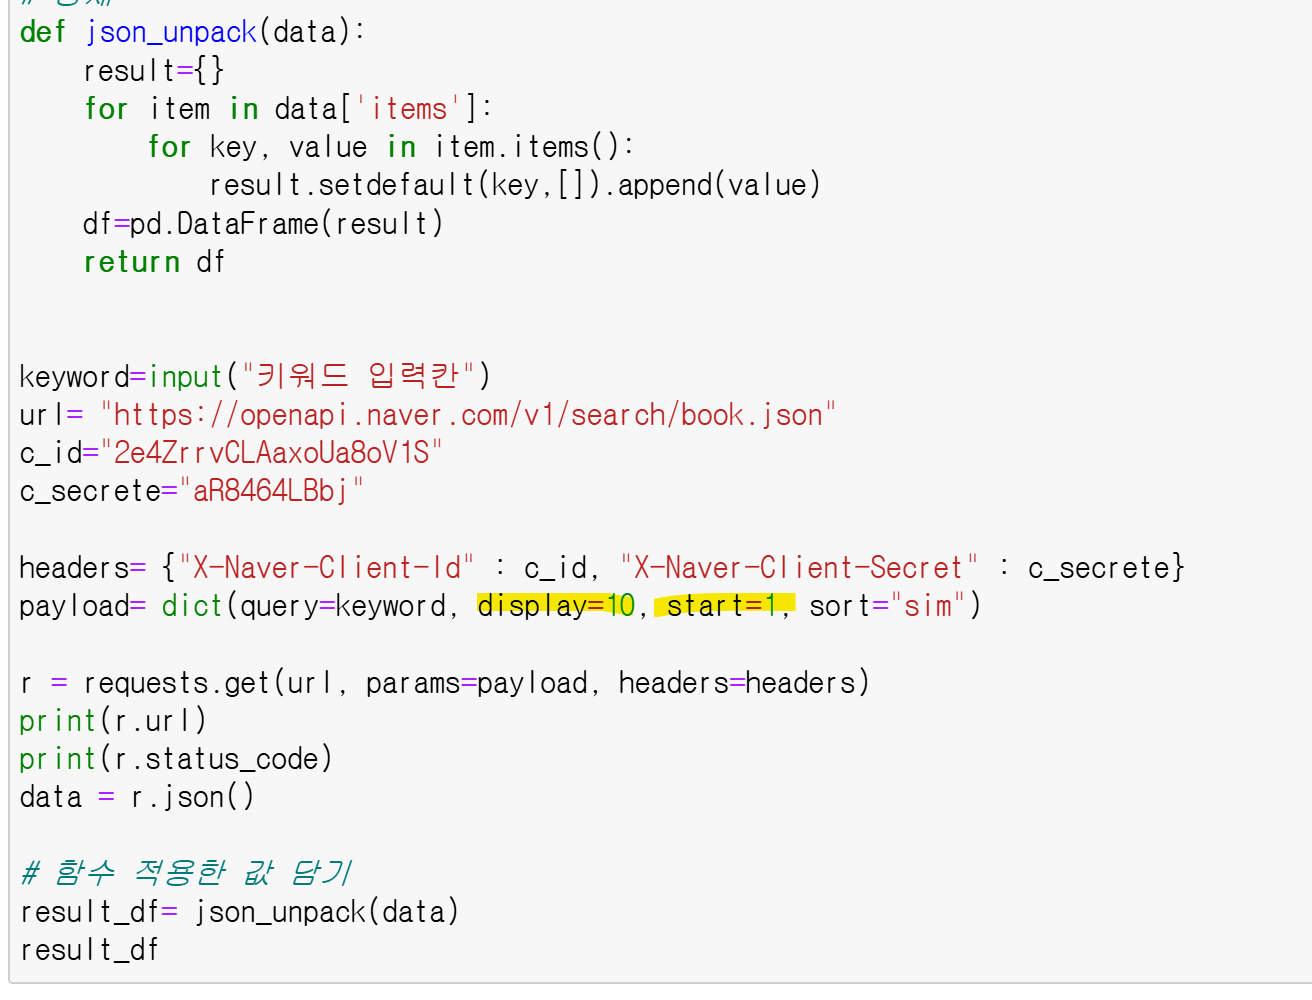
디스플레이를 늘리면 한면에 나오는 수가 늘어난다. 그런데 그다음 장을 보고싶다면? <br> start를 그만큼 늘려주면 그다음 자료들이 나오게된다.<br>
API 명세에 start최대값이 1천으로 되어있으면 1001은 입력해도 안나옴.

## while 반복문을 쓰게되는이유.
break를 쓰더라도 일단 돌리기 시작해야 값을 받을 수 있음
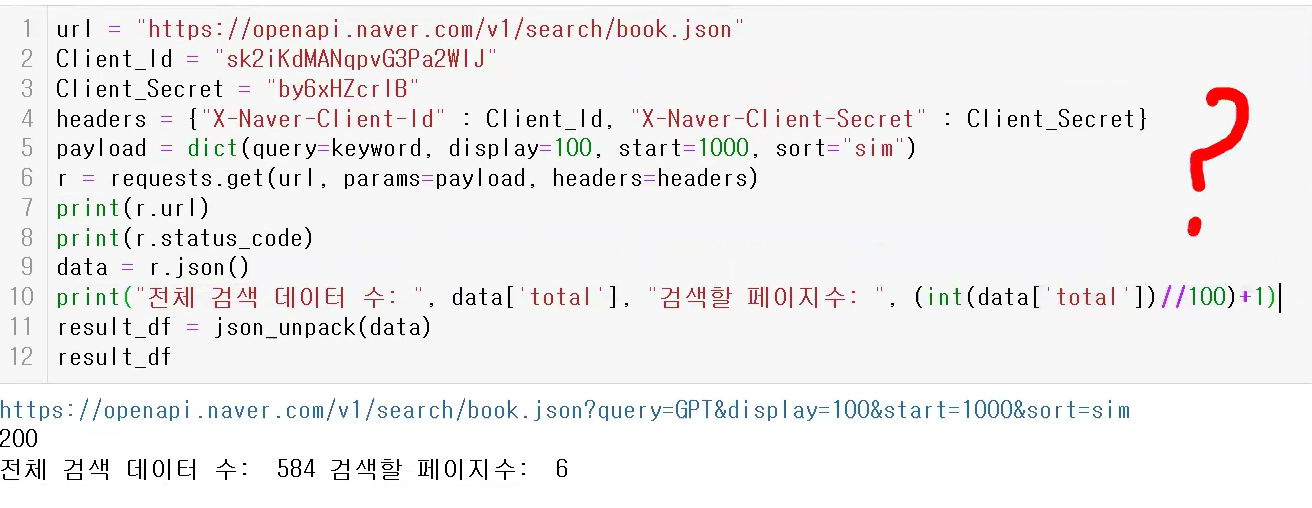
##  API로 검색결과 최대한(1천)가져오기
1. 1회 네이버 서버에 요청
2. 요청결과( total)를 display 수로 나눠서 몇쪽짜리인지 계산.
3. 반복문 작성하고 break 설정.
4. 1페이지 결과를 데이터 프레임으로 만들고 리스트에 append
5. 반복 후 리스트에 append된 데이터 프레임을 1개로 합침.
- 네이버API는 1천이상 수집이 안되니 조건제약 필요함.
- 힌트: 07:24:18 
- for문 하더라도 페이지만 추출해서

In [11]:
import requests

In [ ]:
#1t'
url="https://openapi.naver.com/v1/search/cafearticle.json"

payload = {query: ,display: , start: , sort: }
r = requests.get(url, params=payload,header=header)

c_id = "2e4ZrrvCLAaxoUa8oV1S"
c_secret= "aR8464LBbj"
headers = {'X-Naver-Client-Id': c_id, 'X-Naver-Client-Secret': c_secret }

In [ ]:
print(r.url)
